In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math 

SEEDS = ['42', '43', '44', '46']
STRATEGIES = ['random', 'dal', 'bald', 'mc-max-entropy']

def aggregate_over_sources_agg(experiment='normaal'):

    results = {key:{} for key in STRATEGIES}

    for seed in SEEDS:

        df = pd.read_csv('csv_files/{}_{}.csv'.format(experiment, seed))

        for strategy in STRATEGIES:

            scores_over_sources = []
            for dataset in ['ANLI', 'SNLI', 'WANLI']:

                scores = list(df['acquisition_fn: {} - active_{}_val_acc_epoch'.format(strategy, dataset)])

                scores_over_sources.append(scores)


            mean_over_sources = np.mean(scores_over_sources, axis=0)

            results[strategy][seed] = mean_over_sources
    
    return results

In [112]:
def agg_over_seeds(_results):

    agg_over_seed_results = {}

    for strategy in STRATEGIES:

        agg_over_seeds = []
        for seed in SEEDS:

            agg_over_seeds.append(_results[strategy][seed])

        mean_over_seeds = np.mean(agg_over_seeds, axis=0)
        std_over_seeds = np.std(agg_over_seeds, axis=0)/math.sqrt(5)

        agg_over_seed_results[strategy] = {'mean': mean_over_seeds,
                                           'std':  std_over_seeds} 
        
    return agg_over_seed_results

In [90]:
COLORDICT = {'random':'blue', 'mc-max-entropy':'red', 'bald':'orange', 'dal':'purple'}
def plot_curves(agg_over_seed_results, name):
    
    plt.figure(figsize=(SIZE,SIZE))
    for strategy in STRATEGIES:

        Y = agg_over_seed_results[strategy]['mean']
        std = agg_over_seed_results[strategy]['std']
        X = [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000]
        plt.plot(X,Y, label=strategy, color=COLORDICT[strategy])
        plt.fill_between(X, Y-std, Y+std, alpha=0.10)
        ax = plt.gca()
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.set_ylim([0.36, 0.42])
    
    plt.xlabel("Acquired Examples", fontsize=FONTSIZE-3)
    plt.xticks(fontsize=FONTSIZE-5)
    plt.ylabel("Accuracy", fontsize=FONTSIZE-3)
    plt.yticks(fontsize=FONTSIZE-5)
    plt.title('Agg. validation accuracy', fontsize=FONTSIZE)
    plt.legend(loc='lower right')
    plt.grid()
    plt.savefig(name+'.pdf',format='pdf', bbox_inches='tight')

In [87]:
FONTSIZE = 18
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
SIZE=3
SEEDS = ['42', '43', '44', '46']
# EXPERIMENT = 
plot_curves(agg_over_seeds(aggregate_over_sources(experiment='normaal')), 'normaal')
SEEDS = ['42', '43', '44', '45', '46']
plot_curves(agg_over_seeds(aggregate_over_sources(experiment='ablated')), 'ablated')

FileNotFoundError: [Errno 2] No such file or directory: 'baselines/normaal_42.csv'

In [57]:
# STRATEGIES_2 = ['random', 'dal', 'bald', 'mcme']
# COLORDICT_2 = {'random':'blue', 'mcme':'red', 'bald':'orange', 'dal':'purple'}

# def aggregate_over_sources(experiment='baselines', dataset='anli'):

#     results = {key:{} for key in STRATEGIES_2}

#     for strategy in STRATEGIES_2:
        
#         df = pd.read_csv('{}/{}_{}.csv'.format(experiment, dataset, strategy))
        
#         print(df)
        
#         sys.exit()
        
#         results[strategy]['acc'] = df['project_dir: array - active_ANLI_val_acc_epoch'].tolist()
#         results[strategy]['min'] = df['project_dir: array - active_ANLI_val_acc_epoch__MIN'].tolist()
#         results[strategy]['max'] = df['project_dir: array - active_ANLI_val_acc_epoch__MAX'].tolist()
    
#     return results

# result_dict = aggregate_over_sources()

# def plot_curves(agg_over_seed_results, name):
    
#     plt.figure(figsize=(SIZE,SIZE))
#     for strategy in STRATEGIES_2:

#         Y = agg_over_seed_results[strategy]['acc']
#         Y_min = agg_over_seed_results[strategy]['min']
#         Y_max = agg_over_seed_results[strategy]['max']
#         X = [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000]
#         plt.plot(X,Y, label=strategy, color=COLORDICT_2[strategy])
#         plt.fill_between(X, Y_min, Y_max, alpha=0.10)
#         ax = plt.gca()
#         ax.spines['top'].set_visible(False)
#         ax.spines['right'].set_visible(False)
#         ax.spines['bottom'].set_visible(False)
#         ax.spines['left'].set_visible(False)
#         ax.set_ylim([0.33, 0.42])
    
#     plt.xlabel("Acquired Examples", fontsize=FONTSIZE-3)
#     plt.xticks(fontsize=FONTSIZE-5)
#     plt.ylabel("Accuracy", fontsize=FONTSIZE-3)
#     plt.yticks(fontsize=FONTSIZE-5)
#     plt.title('Agg. validation accuracy', fontsize=FONTSIZE)
#     plt.legend(loc='lower right')
#     plt.grid()
# #     plt.savefig(name+'.pdf',format='pdf', bbox_inches='tight')

   labelled_examples  project_dir: array - _step  \
0                500                      9904.4   
1               1000                     19294.0   
2               1500                     29555.6   
3               2000                     44285.6   
4               2500                     55817.2   
5               3000                     71968.8   
6               3500                     84772.4   
7               4000                     99269.4   

   project_dir: array - _step__MIN  project_dir: array - _step__MAX  \
0                             6962                            17046   
1                            16456                            24960   
2                            25896                            35476   
3                            36350                            51908   
4                            47777                            70418   
5                            57833                            88032   
6                            69193

NameError: name 'sys' is not defined

In [200]:
SEEDS = ['42', '43', '44', '45', '46']
STRATEGIES = ['random', 'dal', 'bald', 'mc-max-entropy']

def aggregate_over_sources(experiment='anli', mnli=None):
    
        
    results = {key:{} for key in STRATEGIES}

    for seed in SEEDS:

        df = pd.read_csv('baselines/{}_{}.csv'.format(experiment, seed))
        
#         print(df)

        for strategy in STRATEGIES:

            scores_over_sources = []
#             for dataset in ['ANLI', 'SNLI', 'WANLI']:

            if mnli:
                experiment_id = 'mnli'
            
            else:
                experiment_id = experiment

            scores = list(df['acquisition_fn: {} - active_{}_val_acc_epoch'.format(strategy, experiment_id.upper())])
            
            scores
            
            results[strategy][seed] = scores
    
    return results

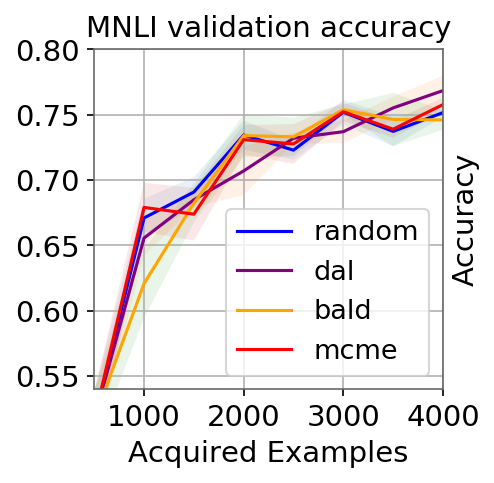

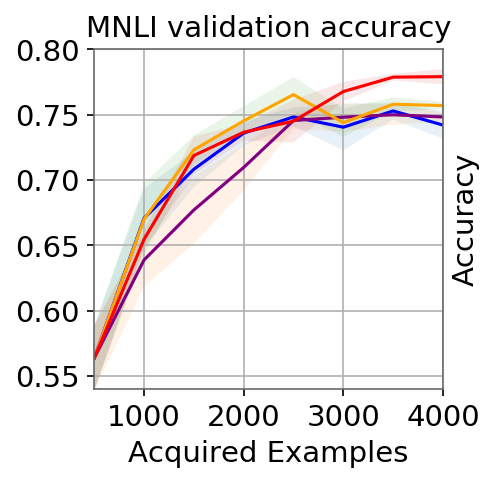

In [206]:
SMALL_SIZE = 13
MEDIUM_SIZE = 14
BIGGER_SIZE = 5

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rcParams["axes.edgecolor"] = "dimgray"
def plot_curves(agg_over_seed_results, title, fname, lim, y_label=True, legend=True):
    
    plt.figure(figsize=(SIZE,SIZE))
    for strategy in STRATEGIES:

        Y = agg_over_seed_results[strategy]['mean']
        std = agg_over_seed_results[strategy]['std']
        X = [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000]
        if strategy == 'mc-max-entropy':
            strategy2 = 'mcme'
        else:
            strategy2 = strategy
        plt.plot(X,Y, label=strategy2, color=COLORDICT[strategy])
        plt.fill_between(X, Y-std, Y+std, alpha=0.10)
        ax = plt.gca()
#         ax.spines['top'].set_visible(True)
#         ax.spines['right'].set_visible(False)
#         ax.spines['bottom'].set_visible(False)
#         ax.spines['left'].set_visible(False)
        ax.set_ylim(lim)
        ax.set_xlim([500,4000])
    
    plt.xlabel("Acquired Examples", fontsize=MEDIUM_SIZE)
    plt.xticks(fontsize=MEDIUM_SIZE)
    if y_label:
        plt.ylabel("Accuracy", fontsize=MEDIUM_SIZE)
    ax.yaxis.set_label_position("right")
    plt.yticks(fontsize=MEDIUM_SIZE)
    plt.title('{} validation accuracy'.format(title), fontsize=MEDIUM_SIZE)
    if legend:
        plt.legend(loc='lower right', fontsize=SMALL_SIZE)
    plt.grid()
    plt.savefig(fname+'.pdf',format='pdf', bbox_inches='tight')


# SEEDS = ['42', '43', '44', '46']
# MEDIUM_SIZE = 14
# # AGG BASELINES
# plot_curves(agg_over_seeds(aggregate_over_sources_agg(experiment='normaal')), 
#             title='Agg.', 
#             fname='normaal', 
#             lim=[0.52, 0.64])
# SEEDS = ['42', '43', '44', '45', '46']
# plot_curves(agg_over_seeds(aggregate_over_sources_agg(experiment='ablated')), 
#             title='Agg.', 
#             fname='ablated', 
#             lim=[0.52, 0.64],
#             legend=False)

SEEDS = ['42', '43', '44', '46']
plot_curves(agg_over_seeds(aggregate_over_sources(experiment='mnli_normaal', mnli=True)), 
            title='MNLI', 
            fname='mnli_normaal', 
            lim=[0.54, 0.8])
SEEDS = ['42', '43', '44', '45', '46']
plot_curves(agg_over_seeds(aggregate_over_sources(experiment='mnli_ablated', mnli=True)), 
            title='MNLI', 
            fname='mnli_ablated', 
            lim=[0.54, 0.8],
            legend=False)

# # SINGLE BASELINES
# MEDIUM_SIZE = 14
# SEEDS = ['42', '43', '44', '45', '46']
# plot_curves(agg_over_seeds(aggregate_over_sources(experiment='anli')), title='ANLI', fname='ANLI', lim=[0.36, 0.42], legend=False)
# plot_curves(agg_over_seeds(aggregate_over_sources(experiment='wanli')), title='WANLI', fname='WANLI', lim=[0.6, 0.72])
# plot_curves(agg_over_seeds(aggregate_over_sources(experiment='snli')), title='SNLI', fname='SNLI', lim=[0.84, 0.9], legend=False)